<a href="https://colab.research.google.com/github/igorlameirao/MVP4-PUCrio/blob/main/MVP_Sprint_4_PucRio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Lendo Dataset

In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/igorlameirao/MVP4-PUCrio/main/Vinho-DataSet.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Remove as linhas com valores NaN
dataset = dataset.dropna()

dataset.head(10)

,acidezFixa,acidezVolatil,acidoCitrico,acucarResidual,cloretos,dioxidoEnxofreLivre,dioxidoEnxofreTotal,densidade,ph,sulfatos,alcool,qualidade
0,7.4,0.70,0.00,1.9,76.0,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,98.0,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,92.0,15.0,54.0,997.0000,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,75.0,17.0,60.0,998.0000,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,76.0,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,75.0,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,69.0,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,65.0,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,73.0,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,71.0,17.0,102.0,0.9978,3.35,0.80,10.5,0


# Separação em conjunto de treino e conjunto de teste com holdout

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values

X = array[:,0:11]
y = array[:,11]
y = y.astype(int)

print("Valores de entrada X:")
print(X)

print("\nValores de saída y:")
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

Valores de entrada X:
[[7.40e+00 7.00e-01 0.00e+00 ... 3.51e+00 5.60e-01 9.40e+00]
 [7.80e+00 8.80e-01 0.00e+00 ... 3.20e+00 6.80e-01 9.80e+00]
 [7.80e+00 7.60e-01 4.00e-02 ... 3.26e+00 6.50e-01 9.80e+00]
 ...
 [6.30e+00 5.10e-01 1.30e-01 ... 3.42e+00 7.50e-01 1.10e+01]
 [5.90e+00 6.45e+02 1.20e-01 ... 3.57e+00 7.10e-01 1.02e+01]
 [6.00e+00 3.10e-01 4.70e-01 ... 3.39e+00 6.60e-01 1.10e+01]]

Valores de saída y:
[0 0 0 ... 1 0 1]


# Modelagem e Inferência

## Criação e avaliação de modelos: linha base

KNN: 0.634861 (0.023072)
CART: 0.734160 (0.028018)
NB: 0.701353 (0.032721)
SVM: 0.618492 (0.030975)


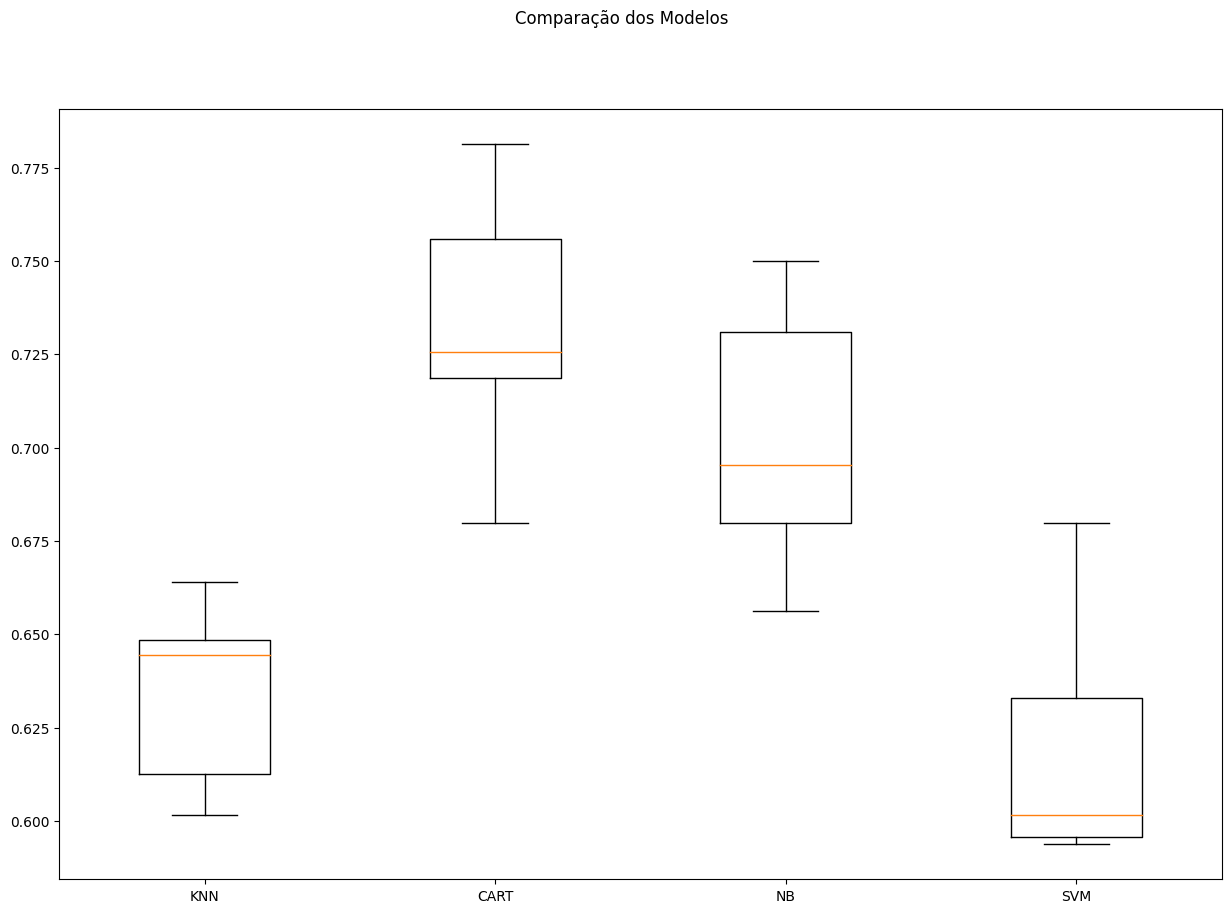

In [ ]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.635 (0.023)
CART-orig: 0.734 (0.028)
NB-orig: 0.701 (0.033)
SVM-orig: 0.618 (0.031)
KNN-padr: 0.713 (0.040)
CART-padr: 0.738 (0.028)
NB-padr: 0.703 (0.032)
SVM-padr: 0.753 (0.044)
KNN-norm: 0.697 (0.032)
CART-norm: 0.737 (0.028)
NB-norm: 0.703 (0.032)
SVM-norm: 0.737 (0.041)


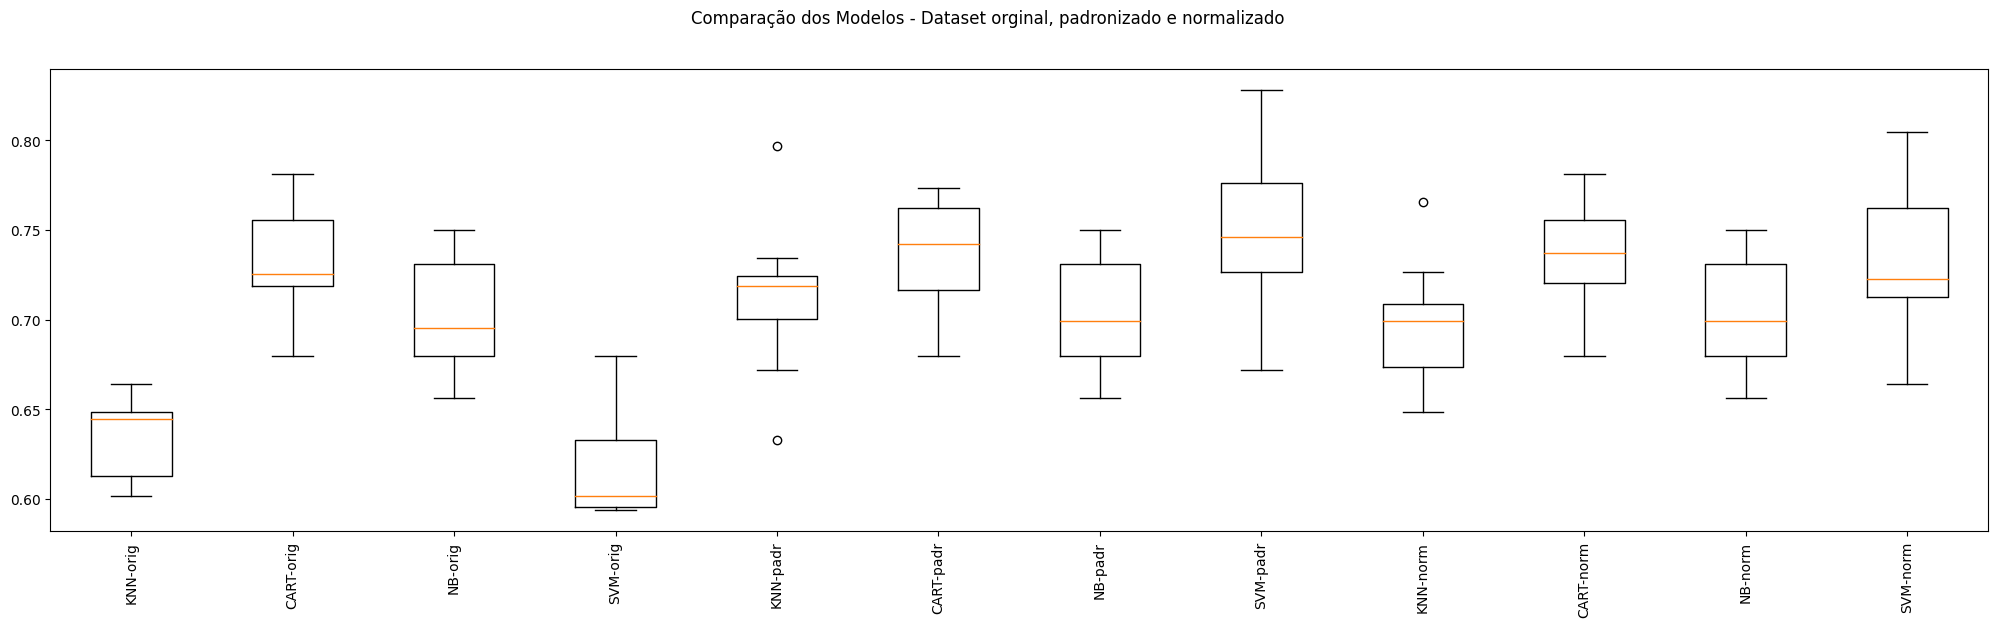

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizadochrome-extension://mcgbeeipkmelnpldkobichboakdfaeon/images/logo-vertical.svg
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

## Otimização dos hiperparâmetros

In [ ]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.695109 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Sem tratamento de missings: knn-padr - Melhor: 0.745116 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}
Sem tratamento de missings: knn-norm - Melhor: 0.752891 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}


# Finalização do Modelo

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = KNeighborsClassifier(metric='manhattan', n_neighbors=15)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.671875


In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=15)

#Simulando a aplicação do modelo em dados não vistos

In [ ]:
# Novos dados - não sabemos a classe!

# idade	rt_pcr	leucocitos	basofilos	creatinina	proteina_c	hemoglobina
data = {'acidezFixa' : [11.2, 7.4, 7.4],
        'acidezVolatil' : [0.28, 0.7, 0.66],
        'acidoCitrico' : [0.56, 0, 0],
        'acucarResidual' : [1.9, 1.9, 1.8],
        'cloretos' : [75, 76, 75],
        'dioxidoEnxofreLivre' : [17, 11, 13],
        'dioxidoEnxofreTotal' : [60, 34, 40],
        'densidade' : [998, 0.9978, .9978],
        'ph' : [3.16, 3.51, 3.51],
        'sulfatos' : [0.58, 0.56, 0.56],
        'alcool' : [9.8, 9.4, 9.4]
        }

atributos = ['acidezFixa', 'acidezVolatil', 'acidoCitrico', 'acucarResidual', 'cloretos', 'dioxidoEnxofreLivre', 'dioxidoEnxofreTotal', 'densidade', 'ph',  'sulfatos', 'alcool']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:11].astype(float)  # Seleciona todas as 7 colunas

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[ 1.65485608 -0.36079683  1.4841536  -0.45321841 -0.04786202  0.10759209
   0.41150046  4.05017453 -0.97910442 -0.46118037 -0.58477711]
 [-0.52835961 -0.35900459 -1.39147228 -0.45321841 -0.02848699 -0.46619252
  -0.37913269 -0.24707482  1.28864292 -0.57920652 -0.96024611]
 [-0.52835961 -0.35917528 -1.39147228 -0.5241662  -0.04786202 -0.27493098
  -0.19667889 -0.24707482  1.28864292 -0.57920652 -0.96024611]]


In [ ]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1 0 0]


#Fazendo o download do arquivo KNN pkl

In [ ]:
import pickle
from google.colab import files

arquivo = 'modelo.pkl'

# Salvar o modelo usando pickle
with open(arquivo, 'wb') as pickle_out:
    pickle.dump(model, pickle_out)

# Baixar o arquivo para o ambiente local
files.download(arquivo)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Fazendo o download do arquivo joblib

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from joblib import dump

# Seus dados de treinamento
data = {'acidezFixa' : [11.2, 7.4, 7.4],
        'acidezVolatil' : [0.28, 0.7, 0.66],
        'acidoCitrico' : [0.56, 0, 0],
        'acucarResidual' : [1.9, 1.9, 1.8],
        'cloretos' : [75, 76, 75],
        'dioxidoEnxofreLivre' : [17, 11, 13],
        'dioxidoEnxofreTotal' : [60, 34, 40],
        'densidade' : [998, 0.9978, .9978],
        'ph' : [3.16, 3.51, 3.51],
        'sulfatos' : [0.58, 0.56, 0.56],
        'alcool' : [9.8, 9.4, 9.4]
        }

atributos = ['acidezFixa', 'acidezVolatil', 'acidoCitrico', 'acucarResidual', 'cloretos', 'dioxidoEnxofreLivre', 'dioxidoEnxofreTotal', 'densidade', 'ph',  'sulfatos', 'alcool']
entrada = pd.DataFrame(data, columns=atributos)

# Extrair as features
newX_train = entrada.values.astype(float)

# Inicializar o StandardScaler
scaler = StandardScaler()

# Ajustar o scaler aos dados de treinamento e transformar os dados
X_train_scaled = scaler.fit_transform(newX_train)

arquivo = 'scaler.joblib'

# Salvar o scaler em um arquivo
dump(scaler, arquivo)

# Fazer o download do arquivo
files.download(arquivo)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Regressão Linear

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from pickle import dump
from pickle import load

In [ ]:
# Cria o modelo
modelo = LogisticRegression(solver='liblinear')

# Treina o modelo
modelo.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
# Salva o modelo no disco
filename = 'modelo_lr.pkl'
dump(modelo, open(filename, 'wb'))

In [ ]:
# Algum tempo depois...
# Carrega o modelo do disco
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.715625


In [ ]:
# Baixar o arquivo para o ambiente local
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>